(2000, 2)
(2000,)


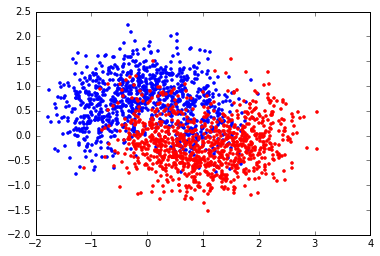

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)

from sklearn import datasets
from polyssifier import Poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=2000, noise=0.4)
print(data.shape)
print(label.shape)

plt.plot(data[label==0,0], data[label==0,1],'.');
plt.plot(data[label==1,0], data[label==1,1],'r.');

In [2]:
# single class example
pol = Poly(data,label, n_folds=10, verbose=1, feature_selection=False)
scores= pol.run()


INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.
INFO:polyssifier.polyssifier:Fold 1
INFO:polyssifier.polyssifier:Running Decision Tree
INFO:polyssifier.polyssifier:Decision Tree            :  Train 1.00, 0.01 sec
INFO:polyssifier.polyssifier:Running Linear SVM
INFO:polyssifier.polyssifier:Linear SVM               :  Train 0.83, 0.18 sec
INFO:polyssifier.polyssifier:Running Logistic Regression
INFO:polyssifier.polyssifier:Logistic Regression      :  Train 0.83, 0.17 sec
INFO:polyssifier.polyssifier:Running Nearest Neighbors
INFO:polyssifier.polyssifier:Nearest Neighbors        :  Train 0.87, 0.17 sec
INFO:polyssifier.polyssifier:Running SVM
INFO:polyssifier.polyssifier:SVM                      :  Train 0.85, 1.33 sec
INFO:polyssifier.polyssifier:Running Multilayer Perceptron
INFO:polyssifier.polyssifier:Multilayer Perceptron    :  Train 0.86, 48.71 sec
INFO:polyssifier.polyssifier:Running Naive Bayes
INFO:polyssifier.polyssifier:N

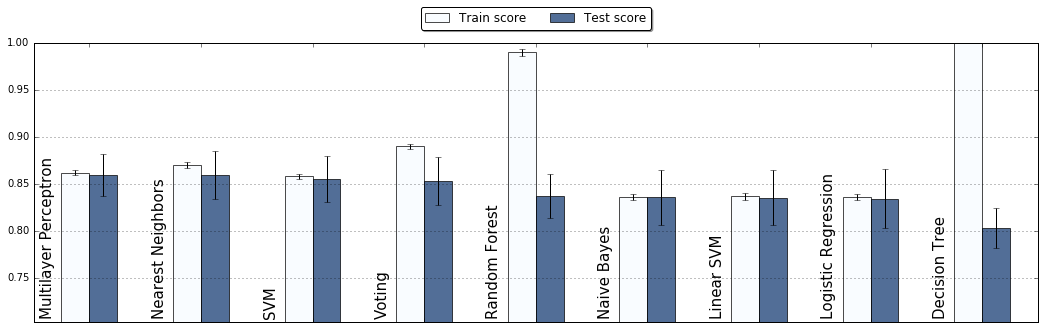

In [3]:
pol.plot()

In [9]:
for key, val in pol.confusions.items():
    print(key)
    print(val)


Decision Tree
[[ 825.  175.]
 [ 219.  781.]]
Multilayer Perceptron
[[ 857.  143.]
 [ 138.  862.]]
SVM
[[ 844.  156.]
 [ 134.  866.]]
Logistic Regression
[[ 825.  175.]
 [ 157.  843.]]
Voting
[[ 863.  137.]
 [ 158.  842.]]
Linear SVM
[[ 827.  173.]
 [ 157.  843.]]
Nearest Neighbors
[[ 878.  122.]
 [ 159.  841.]]
Naive Bayes
[[ 825.  175.]
 [ 154.  846.]]
Random Forest
[[ 845.  155.]
 [ 172.  828.]]


In [10]:
#pol.predictions.head()
pol.predictions.sort_index(inplace=True)

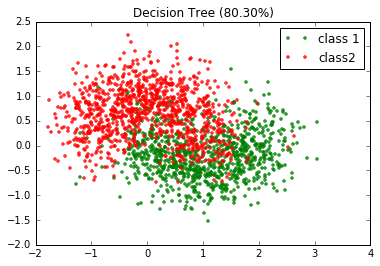

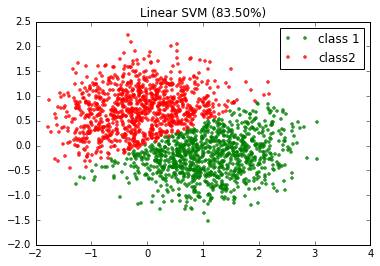

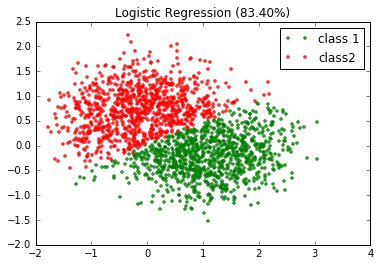

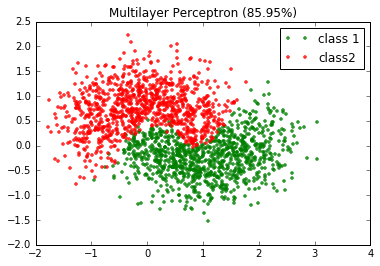

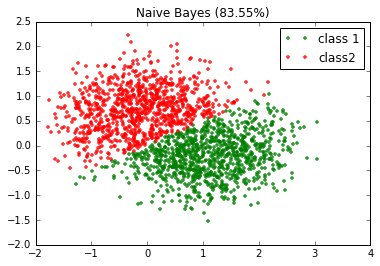

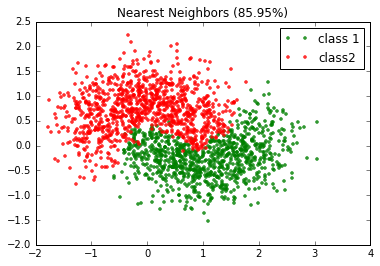

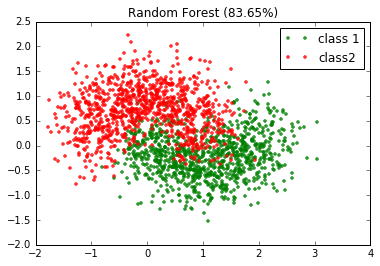

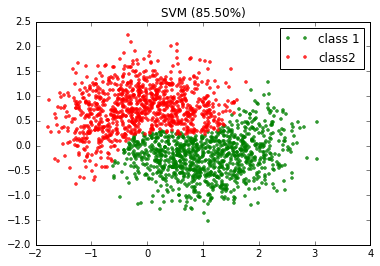

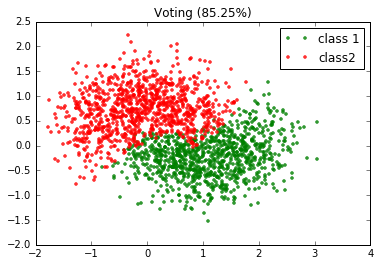

In [22]:
for key, pred in pol.predictions.items():
    plt.figure()
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'g.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'r.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(pol.scores[key]['test']) ))